# Practica Final 

Miembros del grupo:
- Diego Delclaux Dapena
- Alexandros Pappas Montero


In [4]:
# Importación librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import plotly.graph_objects as go
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
import multiprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from matplotlib.figure import Figure
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [5]:
dataframe=pd.read_csv('NCDB_1999_to_2014.csv')

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dataframe.head(10)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,3,03,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,3,03,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,3,03,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,6,18,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,6,18,99,NN,NNNN,01,M,05,99,2,UU,3
5,1999,1,1,17,2,03,QQ,QQ,1,2,1,01,01,01,1984,01,M,28,11,1,UU,1
6,1999,1,1,17,2,03,QQ,QQ,1,2,1,01,02,01,1991,01,M,21,11,1,UU,1
7,1999,1,1,17,2,03,QQ,QQ,1,2,1,01,02,01,1991,02,F,UU,13,2,UU,2
8,1999,1,1,17,2,03,QQ,QQ,1,2,1,01,03,01,1992,01,M,UU,11,2,UU,1
9,1999,1,1,15,2,01,04,UU,1,5,U,UU,01,01,1997,01,M,61,11,1,UU,1


In [7]:
def missingsummary(dataframe):
   numelements = dataframe.count()
   nummissing = dataframe.isna().sum()
   missingsummary = pd.DataFrame(index=numelements.index, 
                              data={'Total':numelements, 
                                    'Missing':nummissing,
                                    'Missing_rate (%)': round(nummissing/numelements * 100, 2)})
   return missingsummary

missingsummary(dataframe)

,Total,Missing,Missing_rate (%)
C_YEAR,5860405,0,0.0
C_MNTH,5860405,0,0.0
C_WDAY,5860405,0,0.0
C_HOUR,5860405,0,0.0
C_SEV,5860405,0,0.0
C_VEHS,5860402,3,0.0
C_CONF,5860405,0,0.0
C_RCFG,5860405,0,0.0
C_WTHR,5860405,0,0.0
C_RSUR,5860405,0,0.0


In [8]:
col_names= dataframe.columns 
distrib={}
for i in range(len(col_names)):
    aux = dataframe.groupby(col_names[i])[["C_YEAR"]].count()
    aux ['percentage'] = 100* (aux['C_YEAR']/aux['C_YEAR'].sum())
    distrib[col_names[i]]= aux
    print(distrib[col_names[i]])

        C_YEAR  percentage
C_YEAR                    
1999    413509    7.055980
2000    422075    7.202147
2001    409389    6.985678
2002    420008    7.166877
2003    407036    6.945527
2004    389050    6.638620
2005    386470    6.594595
2006    378523    6.458990
2007    368507    6.288081
2008    338268    5.772093
2009    330771    5.644166
2010    334555    5.708735
2011    325153    5.548303
2012    322421    5.501685
2013    317058    5.410172
2014    297612    5.078352
        C_YEAR  percentage
C_MNTH                    
1       242723    4.141744
2       414025    7.064785
3       417814    7.129439
4       392533    6.698052
5       468235    7.989806
6       520010    8.873278
7       537693    9.175014
8       547045    9.334594
9       512790    8.750078
10      515911    8.803334
11      496954    8.479858
12      275451    4.700204
01      257151    4.387939
02        9262    0.158044
11        2126    0.036277
12      250297    4.270985
UU         385    0.006570
 

Transformamos las variables C_MNTH y C_WDAY de formato string a formato numerico

In [9]:
print(distrib['C_MNTH'].index)
dataframe['C_MNTH'] = np.where(dataframe['C_MNTH'] == "01", 1, dataframe['C_MNTH'])
dataframe['C_MNTH'] = np.where(dataframe['C_MNTH'] == "02", 2, dataframe['C_MNTH'])
dataframe['C_MNTH'] = np.where(dataframe['C_MNTH'] == "11", 1, dataframe['C_MNTH'])
dataframe['C_MNTH'] = np.where(dataframe['C_MNTH'] == "12", 1, dataframe['C_MNTH'])
print(dataframe.C_MNTH.value_counts())
distrib_cambios=['C_MNTH']

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '01', '02', '11', '12', 'UU'], dtype='object', name='C_MNTH')
1     752297
8     547045
7     537693
6     520010
10    515911
9     512790
11    496954
5     468235
2     423287
3     417814
4     392533
12    275451
UU       385
Name: C_MNTH, dtype: int64


In [10]:
print(distrib['C_WDAY'].index)
dataframe['C_WDAY'] = np.where(dataframe['C_WDAY'] == '1', 1, dataframe['C_WDAY'])
dataframe['C_WDAY'] = np.where(dataframe['C_WDAY'] == '2', 2, dataframe['C_WDAY'])
dataframe['C_WDAY'] = np.where(dataframe['C_WDAY'] == '3', 3, dataframe['C_WDAY'])
dataframe['C_WDAY'] = np.where(dataframe['C_WDAY'] == '4', 4, dataframe['C_WDAY'])
dataframe['C_WDAY'] = np.where(dataframe['C_WDAY'] == '5', 5, dataframe['C_WDAY'])
dataframe['C_WDAY'] = np.where(dataframe['C_WDAY'] == '6', 6, dataframe['C_WDAY'])
dataframe['C_WDAY'] = np.where(dataframe['C_WDAY'] == '7', 7, dataframe['C_WDAY'])
print(dataframe.C_WDAY.value_counts())
distrib_cambios.append('C_WDAY')

for i in range(len(distrib_cambios)):
    aux = dataframe.groupby(distrib_cambios[i])[["C_YEAR"]].count()
    aux ['percentage'] = 100* (aux['C_YEAR']/aux['C_YEAR'].sum())
    distrib[distrib_cambios[i]]= aux
    print(distrib[distrib_cambios[i]])

Index([1, 2, 3, 4, 5, 6, 7, '1', '2', '3', '4', '5', '6', '7', 'U'], dtype='object', name='C_WDAY')
5    999725
4    869653
6    867188
3    825560
2    816265
1    776012
7    704679
U      1323
Name: C_WDAY, dtype: int64
        C_YEAR  percentage
C_MNTH                    
1       752297   12.836946
2       423287    7.222828
3       417814    7.129439
4       392533    6.698052
5       468235    7.989806
6       520010    8.873278
7       537693    9.175014
8       547045    9.334594
9       512790    8.750078
10      515911    8.803334
11      496954    8.479858
12      275451    4.700204
UU         385    0.006570
        C_YEAR  percentage
C_WDAY                    
1       776012   13.241610
2       816265   13.928474
3       825560   14.087081
4       869653   14.839469
5       999725   17.058975
6       867188   14.797407
7       704679   12.024408
U         1323    0.022575


# Preguntas 2 y 3 

2. ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son más propensos a tener accidentes (acción correctiva en prima)?

3. ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son menos propensos a tener accidentes (descuento en prima)?

Hemos encontrado que el método de clustering de modelos no supervisados es útil para responder a estas preguntas, por lo tanto, realizamos un agrupamiento y examinamos qué conglomerados tienen la mayor y la menor cantidad de accidentes. Luego, examinamos el centro del grupo para determinar qué características lo caracterizan mejor. Dado que todas son variables categóricas, las convertimos en variables dummy para lograr catagorizarlas mejor. Para hacer las inferencias, solo elijimos las variables que están relacionadas con los conductores.

Text(0.5, 1.0, 'Distribución genero')

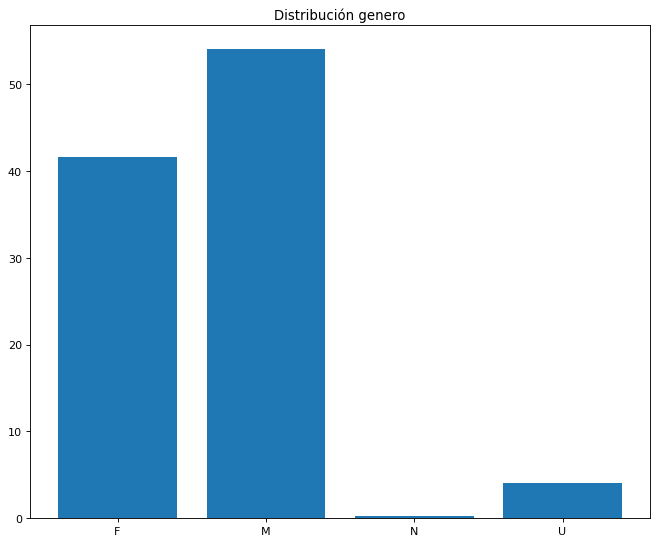

In [12]:
from matplotlib.pyplot import figure
figure(figsize=(10,8 ), dpi=80)
plt.bar(distrib['P_SEX'].index,distrib['P_SEX']['percentage'])
plt.title("Distribución genero")

Text(0.5, 1.0, 'Distribución edad')

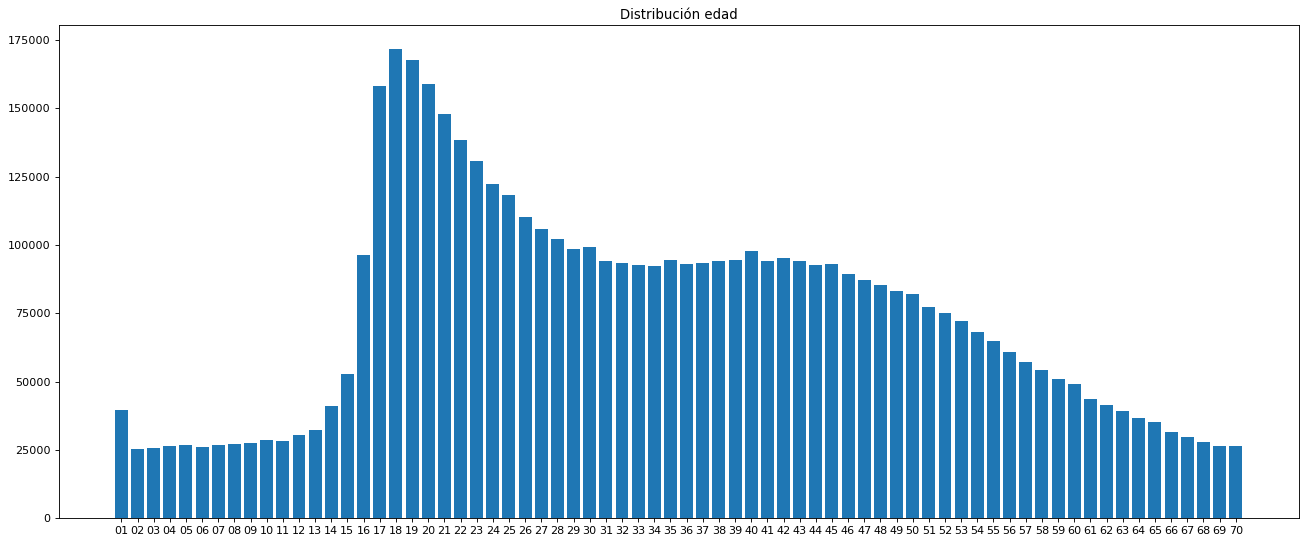

In [13]:
figure(figsize=(20,8 ), dpi=80)
plt.bar(distrib['P_AGE'].index[0:70],distrib['P_AGE']['C_YEAR'][0:70])
plt.title("Distribución edad")

11: Conductor
12: Primera fila centro
13: Primera fila derecha
21: Segunda fila izquierda 
22: Segunda fila centro 
23: Segunda fila derecha 
31: Tercer fila izquierda 
32: Tercer fila centro 
33: Tercer fila derecha 
96: Posición desconocida
97: Sentado encima
98: Pasajero fuera del coche
99: Peatón
NN: NN
QQ: QQ
UU: UU


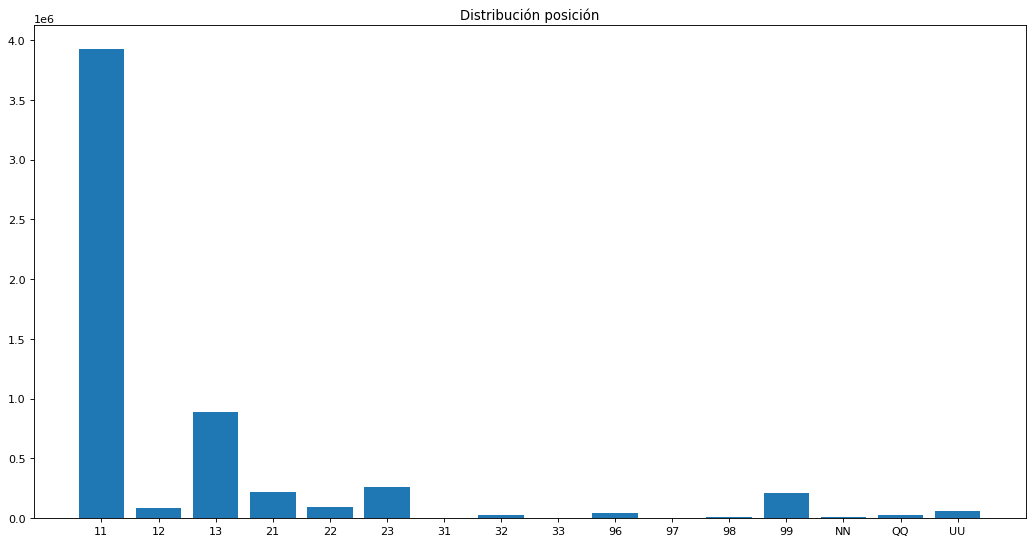

In [14]:
figure(figsize=(16,8 ), dpi=80)
labels= ['Conductor', 'Primera fila centro', 'Primera fila derecha', 'Segunda fila izquierda ', 'Segunda fila centro ', 'Segunda fila derecha ', 'Tercer fila izquierda ', 'Tercer fila centro ', 'Tercer fila derecha ', 'Posición desconocida', 'Sentado encima', 'Pasajero fuera del coche', 'Peatón', 'NN', 'QQ', 'UU']
plt.bar(distrib['P_PSN'].index,distrib['P_PSN']['C_YEAR'])
plt.title("Distribución posición")
for i in range(len(labels)): 
    print(distrib['P_PSN'].index[i]+ ": "+ labels[i])

Text(0.5, 1.0, 'Tipo de vehículo')

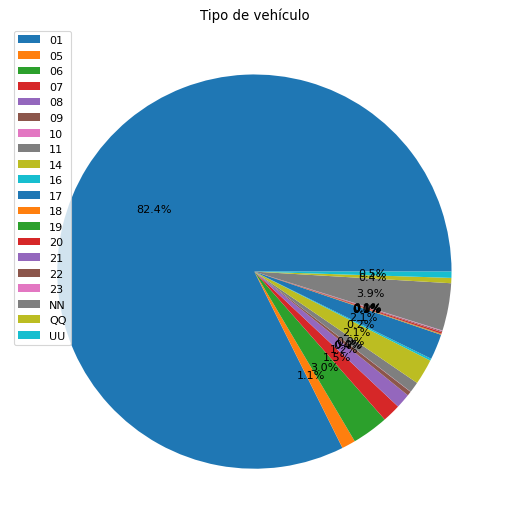

In [15]:
from matplotlib.pyplot import figure

figure(figsize=(10,8 ), dpi=80)

plt.pie(distrib['V_TYPE']['C_YEAR'], autopct='%1.1f%%')
plt.legend( distrib['V_TYPE'].index, loc="best")
plt.title("Tipo de vehículo")

Index(['1901', '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910',
       '1911',
       ...
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'NNNN',
       'UUUU'],
      dtype='object', name='V_YEAR', length=116)


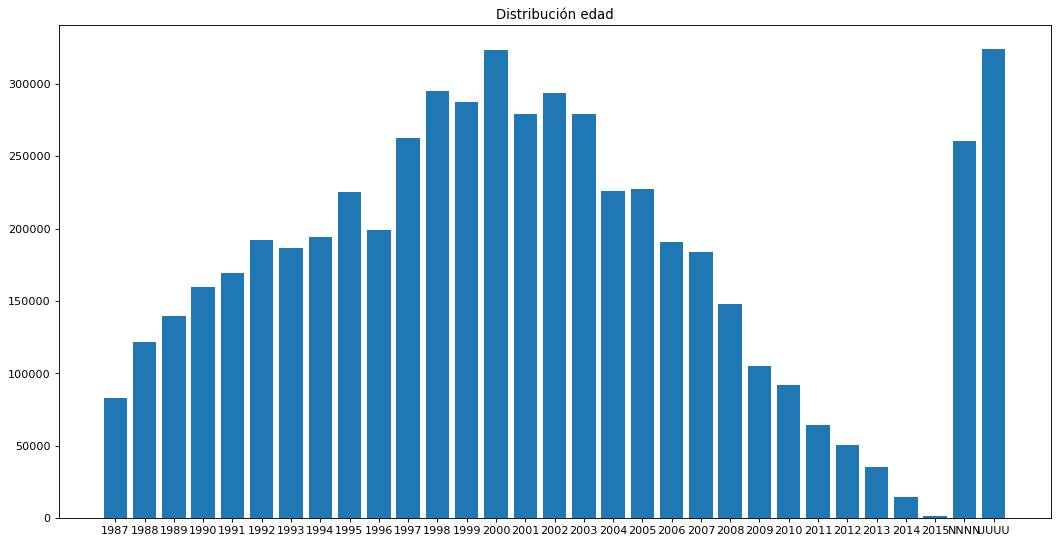

In [16]:
figure(figsize=(16,8 ), dpi=80)
plt.bar(distrib['V_YEAR'].index[85:],distrib['V_YEAR']['C_YEAR'][85:])
plt.title("Distribución edad")
print(distrib['V_YEAR'].index)

Text(0.5, 1.0, 'Tipo de usuario')

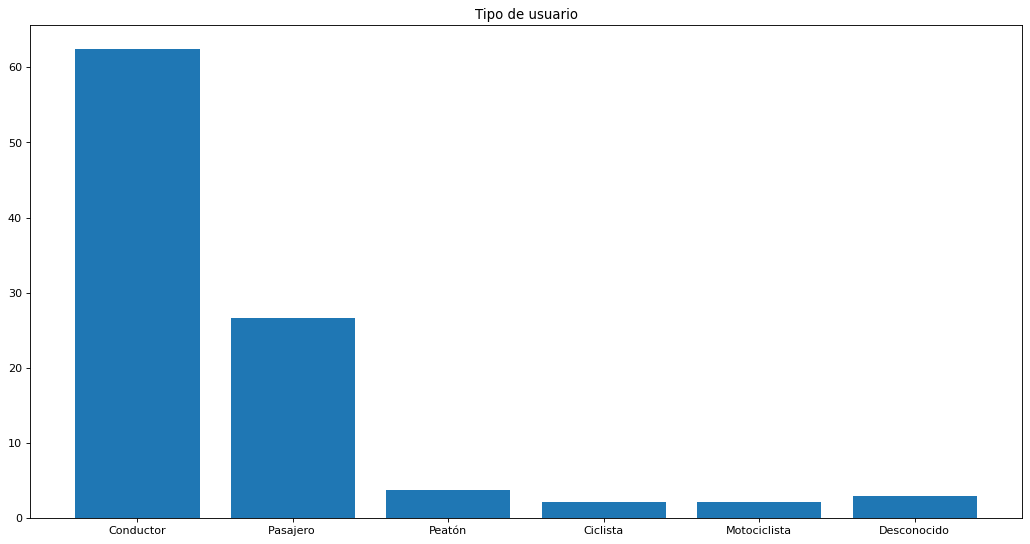

In [17]:
figure(figsize=(16,8 ), dpi=80)
label= ['Conductor', 'Pasajero ', 'Peatón', 'Ciclista', 'Motociclista', 'Desconocido']
plt.bar(label,distrib['P_USER']['percentage'])
plt.title("Tipo de usuario")

In [18]:
def ant(colision, vehiculo):
    if  vehiculo == 'UUUU':
        return None
    elif vehiculo == 'NNNN':
        return None
    else: 
        return (int(colision) - int(vehiculo))
    
dataframe['antiguedad']=dataframe.apply( lambda x: ant(x.C_YEAR, x.V_YEAR), axis=1 )
figure(figsize=(16,8 ), dpi=80)

<Figure size 1280x640 with 0 Axes>

<Figure size 1280x640 with 0 Axes>

Float64Index([ -2.0,  -1.0,   0.0,   1.0,   2.0,   3.0,   4.0,   5.0,   6.0,
                7.0,
              ...
               93.0,  94.0,  95.0,  96.0,  97.0,  98.0,  99.0, 100.0, 101.0,
              103.0],
             dtype='float64', name='antiguedad', length=105)


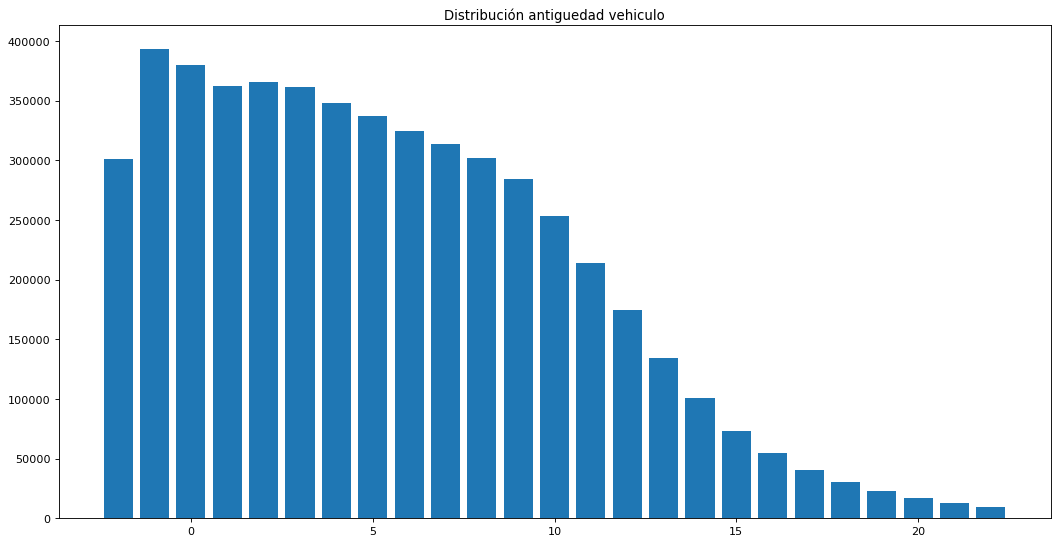

In [19]:
antiguedad = dataframe.groupby('antiguedad')[["C_YEAR"]].count()
antiguedad ['percentage'] = 100* (aux['C_YEAR']/aux['C_YEAR'].sum())
figure(figsize=(16,8 ), dpi=80)
indice= antiguedad.index[0:25].values
valor= antiguedad['C_YEAR'][0:24].values
plt.bar(indice,valor)
plt.title("Distribución antiguedad vehiculo")
print(antiguedad.index)

Empezamos mirando la variable P_sexo para determinar qué fracción de la distribución por género tiene más accidentes, y llegamos a la conclusión de que los hombres tienen más accidentes. Cabe mencionar que muchos conductores se dieron a la fuga sin poder proporcionar sus identidades. Luego se examina la variable P_edad para ver qué fracción de la distribución por edad tiene más accidentes. Notamos que aquellos entre 16 y 27 años experimentan la mayoría de los accidentes, y que a medida que los conductores envejecen después de cumplir los 28, ocurren menos accidentes. También encontramos crucial saber en que posición se encontraban las personas cuando ocurrió el accidente, por lo que verificamos la columna P_PSN. Notando que los conductores (que experimentan un número desproporcionadamente alto de accidentes) son los lesionados con mayor frecuencia, seguidos por los pasajeros de la primera y segunda fila a la derecha, los peatones, la segunda fila izquierda, la segunda fila central y la primera fila central.

Todas estas conclusiones se hicieron utilizando histogramas, sin embargo, se utilizó un gráfico circular para determinar la categoría de vehículo que causa la mayoría de los accidentes. El grupo ‘light Duty Vehicle (Passenger car, Passenger van, Light utility vehicles and light duty pick up trucks´) es la categoría de vehículos que más accidentes experimenta, según las estadísticas de índices de accidentes. Este grupo de vehículos representa el 82,4% de todos los accidentes.

Los modelos de coche del año 2000 son los que más accidentes han sufrido, según un análisis del porcentaje según la distribución del año de más siniestros por colisión.

Los usuarios que más accidentes experimentan son los conductores, seguidos del resto de pasajeros del vehículo, según nuestro análisis de la proporción según la distribución de usuarios de los vehículos que más accidentes tienen.

A continuación, exploramos la variable de los años de vida del coche restando el año en el que se creó el vehículo al año de colisión y hacemos un gráfico. Se puede apreciar que como hay menos coches con más de 20 años de antigüedad en circulación, tiene sentido que haya menos accidentes en estos coches y por ello hay una tendencia descendiente de la antigüedad de los coches.


## Conclusiones generales

Las principales conclusiones que sacamos de las dos primeras preguntas son que los jóvenes que acaban de sacar el carnet de conducir son los más propensos a sufrir accidentes, y que los hombres son más propensos a sufrir accidentes que las mujeres. Por otro lado, las personas mayores tienden a tener menos accidentes; en ese grupo de edad, los accidentes comienzan a disminuir después de los 50 años. Las mujeres mayores de 50 años son, por lo tanto, las menos propensas a colisionar. Por el lado de los vehículos, los más habituales son turismos normales, ya que representan el 80% de los accidentes siendo de media el 70% de los vehículos en circulación. También son los que más tiempo llevan en las carreteras, es lógico que los automóviles con más accidentes sean los que se fabricaron entre 1997 y 2006. El "Fire engine”" y el "small school bus" son los dos vehículos con un riesgo menor de provocar accidentes, con un indice inferior al 1%. Al ser un camión de bomberos y un minibús escolar, es lógico que estos vehículos sean los menos propensos a verse involucrados en un accidente, ya que cuando las personas los ven, tienden a ser más cuidadosos y reducen la velocidad, lo que reduce la probabilidad de una colisión.




# Pregunta 4

¿Qué es lo que más contribuye a que existan fallecimientos en un accidente?

In [20]:
dataframe2, test_df = train_test_split (dataframe, test_size= 0.9, random_state=100,stratify=dataframe['C_SEV'])

In [21]:
def c_hour(valor):
    if valor=='UU' :
        return valor
    elif int(valor)>=22 or int(valor)<= 6 :
        return 'Noche'
    elif int(valor)>6 and int(valor)<= 14 :
        return 'Dia'
    elif int(valor)>14 and int(valor)< 22 :
        return 'Tarde'
    
dataframe2["C_HOUR"]=dataframe2['C_HOUR'].apply( c_hour )

In [22]:
def ant(colision, vehiculo):
    if  vehiculo == 'UUUU':
        return None
    elif vehiculo == 'NNNN':
        return None
    else: 
        return (int(colision) - int(vehiculo))
dataframe2['antiguedad']=dataframe2.apply( lambda x: ant(x.C_YEAR, x.V_YEAR), axis=1 )

In [23]:
eliminar = []
for i in distrib['V_ID'].index: 
    if distrib['V_ID'].loc[i, "percentage"]< 0.1:
        eliminar.append(i)
eliminar.remove('UU')

In [24]:
def V_ID(valor):
    if  valor in eliminar:
        return "Otro"
    else: 
        return valor
dataframe2['V_ID']=dataframe2.apply(lambda x: V_ID(x.V_ID), axis=1 )

In [25]:
eliminar = []
for i in distrib['P_ID'].index: 
    if distrib['P_ID'].loc[i, "percentage"]< 0.1:
        eliminar.append(i)
def P_ID(valor):
    if  valor in eliminar:
        return "Otro"
    else: 
        return valor
dataframe2['P_ID']=dataframe2.apply(lambda x: P_ID(x.P_ID), axis=1 )

In [26]:
def antiguedad(valor):
    if  valor <=3:
        return "Menos de 3"
    elif  (valor >3) and (valor<=6):
        return "Entre 3 y 6"
    elif  (valor >6) and (valor<=10):
        return "Entre 6 y 10"
    elif  (valor >10) and (valor<=15):
        return "Entre 10 y 15"
    elif  (valor >15) and (valor<=20):
        return "Entre 15 y 20"
    else: 
        return 'Mas de 20'
dataframe2['antiguedad']=dataframe2.apply(lambda x: antiguedad(x.antiguedad), axis=1 )

In [27]:
def P_AGE(valor):
    if valor =='NN':
        return valor
    elif valor == "UU":
        return valor
    else:
        valor = int(valor)
        if valor <=18:
            return "Menos de 18"
        elif  (valor >18) and (valor<=25):
            return "Entre 18 y 25"
        elif  (valor >25) and (valor<=40):
            return "Entre 25 y 40"
        elif  (valor >40) and (valor<=50):
            return "Entre 40 y 50"
        elif  (valor >50) and (valor<=70):
            return "Entre 50 y 70"
        elif valor>70:
            return 'Mas de 70'
        else: 
            return valor
dataframe2['P_AGE']=dataframe2.apply(lambda x: P_AGE(x.P_AGE), axis=1 )

In [28]:
eliminar = []
for i in distrib['C_VEHS'].index: 
    if distrib['C_VEHS'].loc[i, "percentage"]< 0.1:
        eliminar.append(i)
def C_VEHS(valor):
    if  valor in eliminar:
        return "Otro"
    else: 
        return valor
dataframe2['C_VEHS']=dataframe2.apply(lambda x: C_VEHS(x.C_VEHS), axis=1 )

In [29]:
dataframe2= dataframe2.drop("V_YEAR",axis=1)
dataframe2 = dataframe2.drop('C_YEAR', axis=1)
dataframe2 = dataframe2.astype({"C_SEV": str}, errors='raise') 

Para realizar un análisis predictivo que nos permita comprender qué variables son importantes a la hora de provocar un accidente, primero construimos un nuevo marco de datos (dataframe2) dividiendo los datos en train y test. Después de segmentar los datos, elegimos los factores que tienen más probabilidades de ser importantes para determinar cómo ocurrió un accidente.

Dado que el día tiene muchas horas, comenzamos dividiéndolo en tres períodos de tiempo generales: la mañana (6:00–6:00), la tarde (14:00–22:00) y la noche (6:00–6:00). 00–22:00).

Al deducir el año en que se fabricó el vehículo del año de la colisión y agregarlo a nuestro marco de datos, podemos investigar la variable de los años de vida del automóvil.

Había categorías en las columnas P_ID, V_ID y C_VEHS con muchos valores intrascendentes, por lo tanto, agrupamos aquellas con menos del 0,1 % en una nueva categoría llamada "Otros" para evitar obstruir el marco de datos. Dividimos los vehículos en 6 intervalos (menos de 3 años, entre 3 y 6 años, entre 6 y 10 años, entre 10 y 15 años y, en última instancia, más de 20 años) en función de su longevidad calculada previamente (la nueva columna de edad). Con respecto a la edad de la víctima del accidente (menores de 18 años; entre 18 y 25; entre 25 y 40; entre 40 y 50; entre 50 y 70; y mayores de 70), seguimos un procedimiento similar.

Finalmente, dado que hemos estimado la edad en otra columna llamada "edad", que es la información que realmente importa, eliminamos las columnas C_YEAR y V_YEAR porque ya no nos son útiles. Además, el modelo se abarrotaría con demasiadas columnas. Para usar la columna C_SEV en dummies más adelante, finalmente modificamos su tipo a string.

In [30]:
def P_ISEV(valor):
    if  valor == "2" :
        return "1" 
    elif valor =="3":
        return("1")
    elif valor =='1':
        return 0
    else: 
        return valor
dataframe2['P_ISEV']=dataframe2.apply(lambda x: P_ISEV(x.P_ISEV), axis=1 )

In [31]:
dataframe2 = dataframe2.drop(dataframe2[dataframe2.C_SEV == 'U' ].index)
dataframe2 = dataframe2.drop(dataframe2[dataframe2.C_SEV == 'X' ].index)
dataframe2 = dataframe2.drop(dataframe2[dataframe2.P_ISEV == 'U' ].index)
dataframe2 = dataframe2.drop(dataframe2[dataframe2.P_ISEV == 'X' ].index)
dataframe2 = dataframe2.drop(dataframe2[dataframe2.P_ISEV == 'N' ].index)

In [32]:
dataframe_dummy=pd.get_dummies(dataframe2, columns=dataframe2.columns, drop_first=True )
train_df, test_df = train_test_split (dataframe_dummy, test_size= 0.9, random_state=100)

In [33]:
train_df_fatality=train_df.drop('P_ISEV_1', axis=1)
test_df_fatality=test_df.drop('P_ISEV_1', axis=1)
y_train_fatality=train_df_fatality['C_SEV_2']
x_train_fatality=train_df_fatality.drop('C_SEV_2', axis=1)
y_test_fatality=test_df_fatality['C_SEV_2']
x_test_fatality=test_df_fatality.drop('C_SEV_2', axis=1)

In [34]:
log = LogisticRegression(random_state=100)
log.fit(x_train_fatality,y_train_fatality)

LogisticRegression(random_state=100)

In [35]:
from matplotlib import pyplot
cols=list(x_train_fatality.columns)
importancia = log.coef_[0]
data_importancia=pd.DataFrame([cols,importancia]).transpose()

In [36]:
data_importancia.columns = ['Variable', 'Coeficiente']
data_importancia['Coeficiente']=data_importancia['Coeficiente'].apply(abs)
data_importancia.sort_values('Coeficiente', ascending=False)

,Variable,Coeficiente
97,C_TRAF_10,1.986854
39,C_CONF_21,1.873347
141,P_ID_05,1.622580
33,C_VEHS_Otro,1.621021
44,C_CONF_31,1.587329
170,P_SAFE_02,1.566872
115,V_ID_05,1.393084
99,C_TRAF_12,1.323871
122,V_TYPE_08,1.264956
109,V_ID_4,1.259942


Creamos una lista de coeficientes de mayor o menor según la importancia de las variables. Vemos que las primeras 5 variables con las coeficientes más grandes (y por tanto más relevancia a la hora de que se produzcan fallecimientos) son: P_ISEV_3 (Muerte,) V_TYPE_08 (Tractor con o sin remolque), P_ID_Otro, C_CONF_21 (Dos vehículos en movimiento hacia la misma dirección de viaje produciéndose colisión trasera) y C_CONF_31 (Dos vehículos en movimiento con diferente sentido de marcha produciéndose colisión frontal). Los resultados obtenidos tienen mucho sentido ya que la principal causa de un fallecimiento es la muerte (P_ISEV_3) por ello tiene un coeficiente mucho mas alto que el resto, también es coherente que las variables C_CONF_21 y C_CONF_31 sean de las que mas contribuyan a un fallecimiento ya que en el análisis para las preguntas 2 y3 se veía claramente que la mayoría de accidentes eran provocados por este tipo de colisiones. Los tractores tienen una alta probabilidad de colisión porque no están tan preparados ni acostumbrados a salir a la carretera. Van a una velocidad mucho menor y cuando conducen por carretera con otros coches hay más tendencia a que haya un accidente, por lo que tiene sentido que sea una variable con coeficiente alto.

# Pregunta 5

Dado un accidente, ¿se puede generar un modelo que prediga si habrá fallecimientos o no? ¿Si se va a necesitar tratamiento médico o no? Las aseguradoras tienen que inmovilizar capital para pagar estas casuísticas. 

Para responder esta pregunta hemos empezado a definir un modelo de regresión logística en la pregunta anterior. Lo primero que hacemos es coger la variable P_ISEV que indica si se necesita tratamiento médico (si se necesita por la gravedad de la lesión, si no se necesita por la poca gravedad de la lesión, y si se necesita por muerte). Esto lo hemos clasificado con 1 siendo necesidad de tratamiento médico y 0 de que no. A continuación, quitamos las categorías que menos aportan dentro de las columnas de P_ISEV y C_SEV siendo U, X y N porque no revelan mucha información. Creamos un dataframe_dummy aplicando dummies a todas las columnas para poder normalizarlas con el objetivo de luego ser capaces de hacer los modelos. A continuación, hacemos train y test sobre este último dataframe.

In [37]:
predictions_log=log.predict(x_test_fatality)
acc_log=accuracy_score(y_test_fatality,predictions_log)
acc_log

0.9826254943532856

Una vez tenemos toda esta información, empezamos a generar un modelo que prediga si habrá fallecimientos o no Creamos un test_df_fatality y un train_df_fatality sobre los train y test hechos previamente, pero sin la variable objetivo P_ISEV_1. Creo unos sub datatsets x e y sobre estos con y sin la variable objetivo C_SEV_2. Hacemos esta modificación para que el modelo tenga más sentido, ya que si ya sabes si el paciente ha fallecido o no, no hace falta meter la variable de si el paciente ha estado hospitalizado o no, ya que la primera variable ya te dice si ha muerto o no. Y generamos un modelo de regresión logística, al ver que el modelo predice tan bien (accuracy=0,98) no hemos ccreido necesario hacer mas modelos.

### Modelo para predecir si necesitará tratamiento médico

In [38]:
train_df_injury=train_df.drop('C_SEV_2', axis=1)
test_df_injury=test_df.drop('C_SEV_2', axis=1)
y_train_injury=train_df_injury['P_ISEV_1']
x_train_injury=train_df_injury.drop('P_ISEV_1', axis=1)
y_test_injury=test_df_injury['P_ISEV_1']
x_test_injury=test_df_injury.drop('P_ISEV_1', axis=1)

Empezamos a generar un modelo que prediga si se va a necesitar tratamiento médico o no. Creamos un test_df_injury y un train_df_injury sobre los train y test hechos previamente, pero sin la variable objetivo C_SEV_2. Creo unos sub datatsets x e y sobre estos con y sin la variable objetivo P_ISEV_1. Hacemos esta modificación para que el modelo tenga más sentido, ya que si sabes si ya sabes si hay hospitalizados o no, no hace falta meter la variable si ha muerto un paciente ya que si hay muerte obviamente hay un hospitalizado. En este caso hemos querido aplicar mas los conocimientos de clase y por ello hemos usado distintos tipos de modelos de clasificación, tambein hemos utilizado mas modelos ya que gracias a las metricas hemos podido onservar que no eran modelos que predecian la variable objetivo muy bien. En logistic regression y knn solamente utilizamos test en las métricas ya que no se está iterando el modelo. En el resto de modelos que hemos utilizado (Random Forest Classifier, Gradient Boosting, y el Bagging Classifier ) si hay iteraciones y por ello puede haber overfitting, por ellos utilizamos train y test para comparar entre ellos y para ver que la diferencia no es muy grande, así el modelo no se ajusta demasiado a los datos.

## Logistic Regresion

In [39]:
log = LogisticRegression(random_state=100)
log.fit(x_train_injury,y_train_injury)
predictions_log=log.predict(x_test_injury)

In [40]:
acc_log=accuracy_score(y_test_injury,predictions_log)
pre_log=precision_score(y_test_injury,predictions_log)
rec_log=recall_score(y_test_injury,predictions_log)
f1_log=f1_score(y_test_injury,predictions_log)
cm_log=confusion_matrix(y_test_injury,predictions_log)
predictions_proba_log=log.predict_proba(x_test_injury)[:,1]
auc_log=roc_auc_score(y_test_injury, predictions_proba_log)
fp_log,tp_log, x_log= roc_curve(y_test_injury, predictions_proba_log)

print('Accuracy: '+str(acc_log) )
print('Recall: '+str(rec_log) )
print('Precission: '+str(f1_log) )
print('Precission: '+str(pre_log) )
print('Confussion matrix: ' )
print(cm_log)
print('AUC: ' + str(auc_log))

Accuracy: 0.699242852253927
Recall: 0.777370440637348
Precission: 0.7458947116289415
Precission: 0.7168686981629714
Confussion matrix: 
[[127321  86094]
 [ 62428 217984]]
AUC: 0.7717281244646541


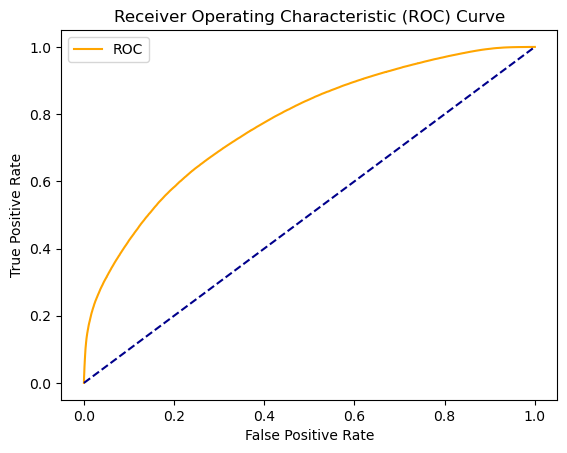

In [41]:
def plot_roc_curve(fp_log, tp_log):
    plt.plot(fp_log, tp_log, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fp_log,tp_log)

## KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train_injury,y_train_injury)
predictions_knn= knn.predict(x_test_injury) 
print(predictions_knn)

[1 0 1 ... 1 0 0]


In [56]:
acc_knn=accuracy_score(y_test_injury,predictions_knn)
pre_knn=precision_score(y_test_injury,predictions_knn)
rec_knn=recall_score(y_test_injury,predictions_knn)
f1_knn=f1_score(y_test_injury,predictions_knn)
cm_knn=confusion_matrix(y_test_injury,predictions_knn)
predictions_proba_knn=log.predict_proba(x_test_injury)[:,1]
auc_knn=roc_auc_score(y_test_injury, predictions_proba_knn)
fp_knn,tp_knn, x_knn= roc_curve(y_test_injury, predictions_proba_knn)

print('Accuracy: '+str(acc_knn) )
print('Recall: '+str(rec_knn) )
print('Precission: '+str(f1_knn) )
print('Precission: '+str(pre_knn) )
print('Confussion matrix: ' )
print(cm_knn)
print('AUC: ' + str(auc_knn))

Accuracy: 0.6780552703679629
Recall: 0.7715112049413007
Precission: 0.7312931091306426
Precission: 0.6950603203161395
Confussion matrix: 
[[118501  94914]
 [ 64071 216341]]
AUC: 0.7717281244646541


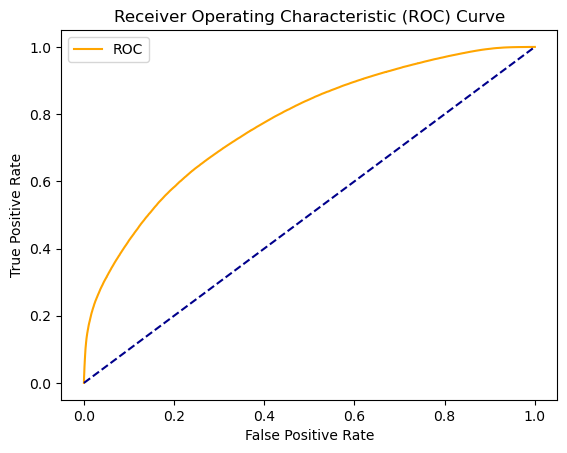

In [57]:
def plot_roc_curve(fp_knn, tp_knn):
    plt.plot(fp_knn, tp_knn, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fp_knn,tp_knn)

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
n_estimators=[100, 250, 750]

min_samples_split=[10]
for i in min_samples_split:
    print('Mínimo número de elementos por hoja: '+ str(i))
    forest = RandomForestClassifier(n_estimators=750, min_samples_split=i)

    forest.fit(x_train_injury,y_train_injury)
    predictions_forest=forest.predict(x_train_injury)
    acc_forest=accuracy_score(y_train_injury,predictions_forest)
    pre_forest=precision_score(y_train_injury,predictions_forest)
    rec_forest=recall_score(y_train_injury,predictions_forest)
    f1_forest=f1_score(y_train_injury,predictions_forest)
    cm_forest=confusion_matrix(y_train_injury,predictions_forest)
    predictions_proba_forest=forest.predict_proba(x_train_injury)[:,1]
    auc_forest=roc_auc_score(y_train_injury, predictions_proba_forest)
    fp_forest,tp_forest, x_forest= roc_curve(y_train_injury, predictions_proba_forest)
    print('Train')
    print('Accuracy : '+str(acc_forest) )
    print('Recall: '+str(rec_forest) )
    print('Precission: '+str(f1_forest) )
    print('Precission: '+str(pre_forest) )
    print('Confussion matrix: ' )
    print(cm_forest)
    print('AUC: ' + str(auc_forest))
    
    
    forest.fit(x_train_injury,y_train_injury)
    predictions_forest_test=forest.predict(x_test_injury)
    acc_forest_test=accuracy_score(y_test_injury,predictions_forest_test)
    pre_forest_test=precision_score(y_test_injury,predictions_forest_test)
    rec_forest_test=recall_score(y_test_injury,predictions_forest_test)
    f1_forest_test=f1_score(y_test_injury,predictions_forest_test)
    cm_forest_test=confusion_matrix(y_test_injury,predictions_forest_test)
    predictions_proba_forest_test=forest.predict_proba(x_test_injury)[:,1]
    auc_forest_test=roc_auc_score(y_test_injury, predictions_proba_forest_test)
    fp_forest_test,tp_forest_test, x_forest_test= roc_curve(y_test_injury, predictions_proba_forest_test)
   
    print('Test')
    print('Accuracy : '+str(acc_forest_test) )
    print('Recall: '+str(rec_forest_test) )
    print('Precission: '+str(f1_forest_test) )
    print('Precission: '+str(pre_forest_test) )
    print('Confussion matrix: ' )
    print(cm_forest_test)
    print('AUC: ' + str(auc_forest_test))

Mínimo número de elementos por hoja: 10
Train
Accuracy : 0.9215586214438025
Recall: 0.9539789378763969
Precission: 0.9322716686599105
Precission: 0.9115302951041635
Confussion matrix: 
[[20943  2875]
 [ 1429 29622]]
AUC: 0.9786127021521636
Test
Accuracy : 0.7130594317443153
Recall: 0.79040839906994
Precission: 0.7577707917720125
Precission: 0.7277216507369478
Confussion matrix: 
[[130488  82927]
 [ 58772 221640]]
AUC: 0.7889181596429399


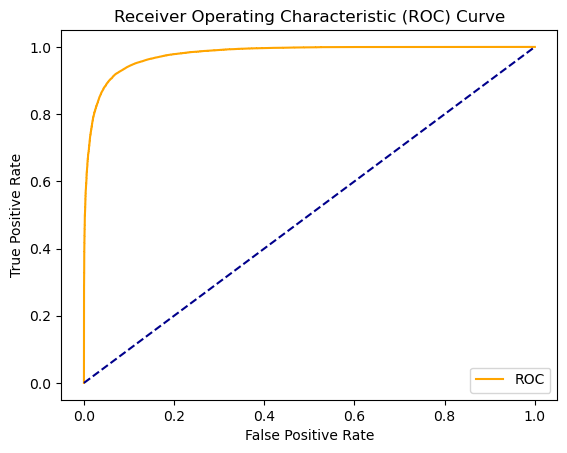

In [44]:
def plot_roc_curve(fp_forest,tp_forest):
    plt.plot(fp_forest,tp_forest, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fp_forest,tp_forest)

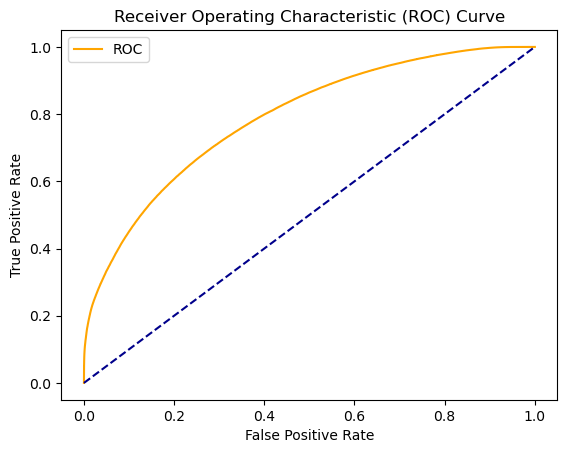

In [45]:
def plot_roc_curve(fp_forest_test,tp_forest_test):
    plt.plot(fp_forest_test,tp_forest_test, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fp_forest_test,tp_forest_test)

## Bagging Classifier

In [46]:
from  sklearn.ensemble import BaggingClassifier
max_features=[0.3]
for i in max_features:
    print('Numero de variables utilizado: '+ str(i))
    bagging = BaggingClassifier(n_estimators=400,max_features=i )
    bagging.fit(x_train_injury,y_train_injury)

    bagging.fit(x_train_injury,y_train_injury)
    predictions_bagging=bagging.predict(x_train_injury)
    acc_bagging=accuracy_score(y_train_injury,predictions_bagging)
    pre_bagging=precision_score(y_train_injury,predictions_bagging)
    rec_bagging=recall_score(y_train_injury,predictions_bagging)
    f1_bagging=f1_score(y_train_injury,predictions_bagging)
    cm_bagging=confusion_matrix(y_train_injury,predictions_bagging)
    predictions_proba_bagging=bagging.predict_proba(x_train_injury)[:,1]
    auc_bagging=roc_auc_score(y_train_injury, predictions_proba_bagging)
    fp_bagging,tp_bagging, x_bagging= roc_curve(y_train_injury, predictions_proba_bagging)
    
    print('Train')
    print('Recall: '+str(rec_bagging) )
    print('Precission: '+str(f1_bagging) )
    print('Precission: '+str(pre_bagging) )
    print('Confussion matrix: ' )
    print(cm_bagging)
    print('AUC: ' + str(auc_bagging))
    
    bagging.fit(x_train_injury,y_train_injury)
    predictions_bagging_test=bagging.predict(x_test_injury)
    acc_bagging_test=accuracy_score(y_test_injury,predictions_bagging_test)
    pre_bagging_test=precision_score(y_test_injury,predictions_bagging_test)
    rec_bagging_test=recall_score(y_test_injury,predictions_bagging_test)
    f1_bagging_test=f1_score(y_test_injury,predictions_bagging_test)
    cm_bagging_test=confusion_matrix(y_test_injury,predictions_bagging_test)
    predictions_proba_bagging_test=bagging.predict_proba(x_test_injury)[:,1]
    auc_bagging_test=roc_auc_score(y_test_injury, predictions_proba_bagging_test)
    fp_bagging_test,tp_bagging_test, x_bagging_test= roc_curve(y_test_injury, predictions_proba_bagging_test)
   
    print('Test')
    print('Accuracy : '+str(acc_bagging_test) )
    print('Recall: '+str(rec_bagging_test) )
    print('Precission: '+str(f1_bagging_test) )
    print('Precission: '+str(pre_bagging_test) )
    print('Confussion matrix: ' )
    print(cm_bagging_test)
    print('AUC: ' + str(auc_bagging_test))

Numero de variables utilizado: 0.3
Train
Recall: 0.9817719236095456
Precission: 0.9225159250124828
Precission: 0.870005707762557
Confussion matrix: 
[[19263  4555]
 [  566 30485]]
AUC: 0.9814360972682608
Test
Accuracy : 0.6965880763911249
Recall: 0.867773133817383
Precission: 0.7645989558539579
Precission: 0.6833516340016119
Confussion matrix: 
[[100660 112755]
 [ 37078 243334]]
AUC: 0.7788818511309828


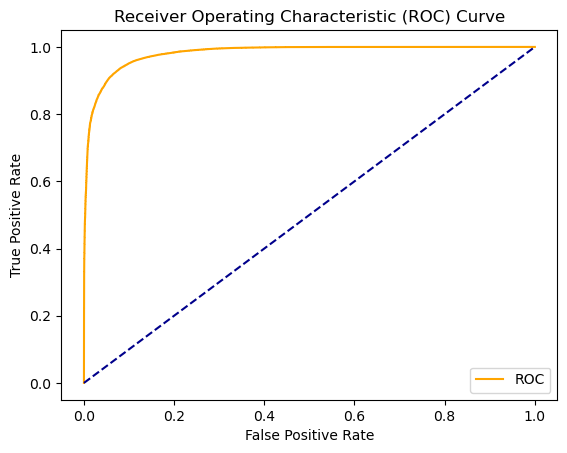

In [47]:
def plot_roc_curve(fp_bagging,tp_bagging):
    plt.plot(fp_bagging,tp_bagging, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fp_bagging,tp_bagging)

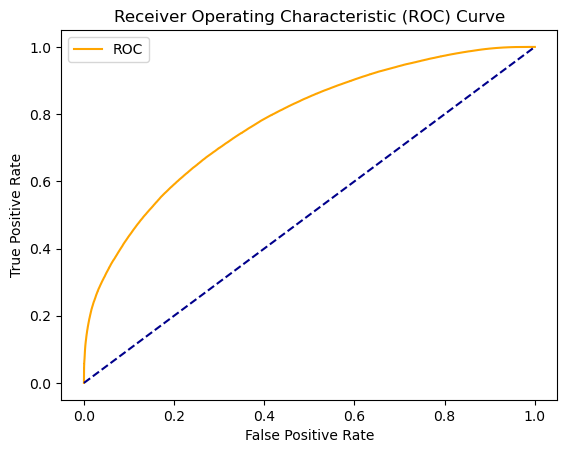

In [48]:
def plot_roc_curve(fp_bagging_test,tp_bagging_test):
    plt.plot(fp_bagging_test,tp_bagging_test, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fp_bagging_test,tp_bagging_test)

## Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
subsample= [0.3]
for i in subsample:
    print('Numero de variables utilizado: '+ str(i))
    boosting = GradientBoostingClassifier(n_estimators=300, min_samples_leaf=20, subsample =i )
    boosting.fit(x_train_injury,y_train_injury)
    predictions_boosting=bagging.predict(x_train_injury)
    acc_boosting=accuracy_score(y_train_injury,predictions_boosting)
    pre_boosting=precision_score(y_train_injury,predictions_boosting)
    rec_boosting=recall_score(y_train_injury,predictions_boosting)
    f1_boosting=f1_score(y_train_injury,predictions_boosting)
    cm_boosting=confusion_matrix(y_train_injury,predictions_boosting)
    predictions_proba_boosting=bagging.predict_proba(x_train_injury)[:,1]
    auc_boosting=roc_auc_score(y_train_injury, predictions_proba_boosting)
    fp_boosting,tp_boosting, x_boosting= roc_curve(y_train_injury, predictions_proba_boosting)
   
    print('Train')
    print('Accuracy : '+str(acc_boosting) )
    print('Recall: '+str(rec_boosting) )
    print('Precission: '+str(f1_boosting) )
    print('Precission: '+str(pre_boosting) )
    print('Confussion matrix: ' )
    print(cm_boosting)
    print('AUC: ' + str(auc_boosting))
    
    boosting.fit(x_train_injury,y_train_injury)
    predictions_boosting_test=bagging.predict(x_test_injury)
    acc_boosting_test=accuracy_score(y_test_injury,predictions_boosting_test)
    pre_boosting_test=precision_score(y_test_injury,predictions_boosting_test)
    rec_boosting_test=recall_score(y_test_injury,predictions_boosting_test)
    f1_boosting_test=f1_score(y_test_injury,predictions_boosting_test)
    cm_boosting_test=confusion_matrix(y_test_injury,predictions_boosting_test)
    predictions_proba_boosting_test=bagging.predict_proba(x_test_injury)[:,1]
    auc_boosting_test=roc_auc_score(y_test_injury, predictions_proba_boosting_test)
    fp_boosting_test,tp_boosting_test, x_boosting_test= roc_curve(y_test_injury, predictions_proba_boosting_test)
    
    print('Test')
    print('Accuracy : '+str(acc_boosting_test) )
    print('Recall: '+str(rec_boosting_test) )
    print('Precission: '+str(f1_boosting_test) )
    print('Precission: '+str(pre_boosting_test) )
    print('Confussion matrix: ' )
    print(cm_boosting_test)
    print('AUC: ' + str(auc_boosting_test))

Numero de variables utilizado: 0.3
Train
Accuracy : 0.9044269077256739
Recall: 0.9840584844288429
Precission: 0.920971728253662
Precission: 0.8654864750035406
Confussion matrix: 
[[19069  4749]
 [  495 30556]]
AUC: 0.9821463195185087
Test
Accuracy : 0.6965880763911249
Recall: 0.867773133817383
Precission: 0.7645989558539579
Precission: 0.6833516340016119
Confussion matrix: 
[[100660 112755]
 [ 37078 243334]]
AUC: 0.7788818511309828


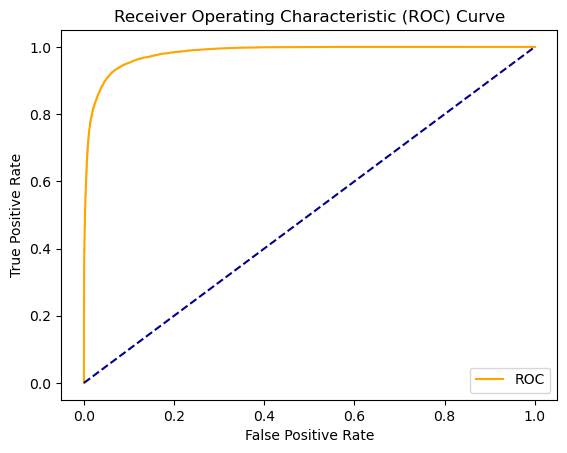

In [50]:
def plot_roc_curve(fp_boosting,tp_boosting):
    plt.plot(fp_boosting,tp_boosting, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fp_boosting,tp_boosting)

Tras analizar todos los modelos se ve claramente que los modelos que mejor predicen de mayor a menor son bagging, random forest, knn, logistic regression y por último boosting

## Pregunta 6

Libertad para generar análisis de valor y nuevas ideas. Se debe atacar mínimo un modelo (estimar si habrá fallecidos o no). Hecho esto, se puede plantear de forma opcional otros alcances (libertad para plantear opciones). 

Puesto que el modelo de bagging es el que mejor predice, lo elegimos para estimar si habrá fallecidos o no.

In [52]:
predictions = bagging.predict(x_test_injury)

# Imprimir las predicciones
print(predictions)


[1 0 1 ... 0 0 0]


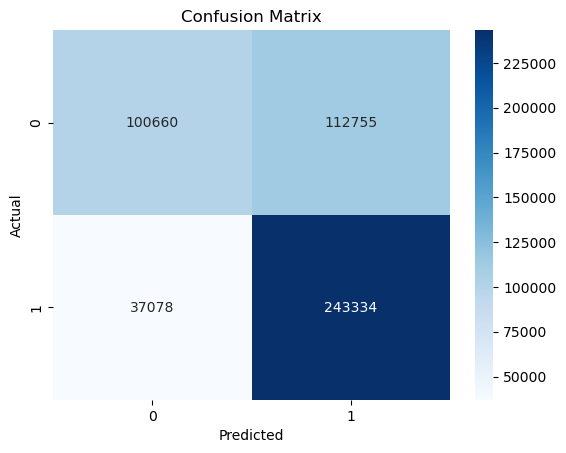

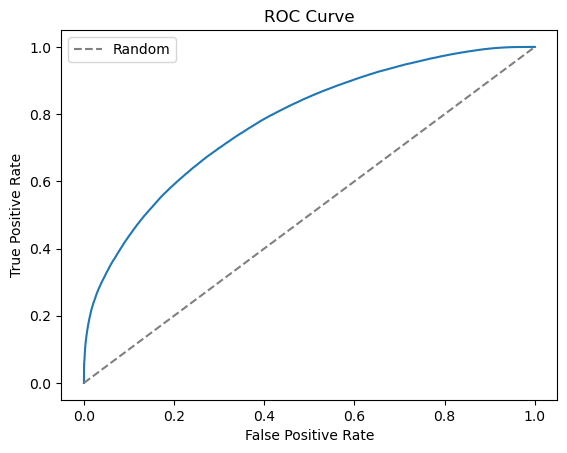

In [54]:
# Matriz de confusión
cm = confusion_matrix(y_test_injury, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Probabilidades de predicción
predictions_proba = bagging.predict_proba(x_test_injury)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test_injury, predictions_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
